In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [83]:
def explore(enemyDist):
  return 1.0 if enemyDist > 4.0 else 0.0

def back_to_base(baseDist, allyDist):
  return baseDist / 10.0 if allyDist > 10.0 else 0.0

def defend_base(baseDist, enemyDist):
  return 0.0 if enemyDist > 4.0 else 6.0 / (baseDist + 1)

def flee_to_base(baseDist, enemyDist):
  return 0.0 if enemyDist > 4.0 else baseDist / 8.0


ENEMY_DIST = np.arange(0, 30, 0.05)
BASE_DIST = np.arange(0, 30, 0.05)
ALLY_DIST = np.arange(0, 30, 0.05)

ALLY_DIST = [100]

img = np.zeros((BASE_DIST.shape[0], ENEMY_DIST.shape[0]))
ht = np.zeros((4, ENEMY_DIST.shape[0], ENEMY_DIST.shape[0]))
# TODO: Vectorize
for iad, ad in enumerate(ALLY_DIST):
  print(f"ally distance: {ad}")
  for ibd, bd in enumerate(BASE_DIST):
    for ied, ed in enumerate(ENEMY_DIST):
          utility = np.array([explore(ed), back_to_base(bd, ad), defend_base(bd, ed), flee_to_base(bd, ed)])
          #if utility[-1] > 0.8:
          #  print(flee_to_base(bd, ed))
          for i in range(utility.shape[0]):
              ht[i][ibd][ied] = utility[i]
          img[ibd][ied] = np.argmax(utility)
  break

ally distance: 100


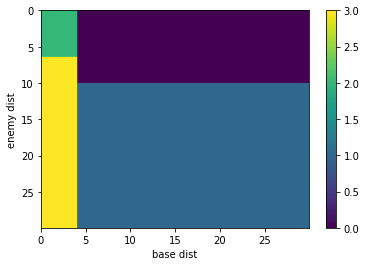

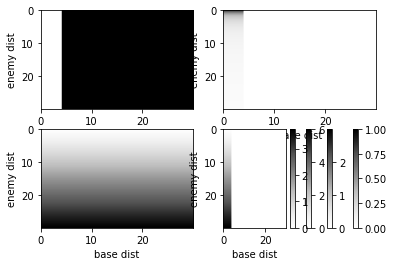

In [84]:
fig, ax = plt.subplots()
for i in range(4): # so all colors are present
  img[0][i] = i

et=[np.min(BASE_DIST), np.max(BASE_DIST), np.max(ENEMY_DIST), np.min(ENEMY_DIST)]
#print(f"average: {np.average(img)}")
im = ax.imshow(img, extent=et)
ax.set_aspect('auto')
ax.set_xlabel("base dist")
ax.set_ylabel("enemy dist")


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(4):
    im = ax[i %2, i // 2].imshow(ht[i], extent=et, cmap='Greys')
    ax[i %2, i // 2].set_aspect('auto')
    ax[i %2, i // 2].set_xlabel("base dist")
    ax[i %2, i // 2].set_ylabel("enemy dist")
    plt.colorbar(im)

# Yellow -  flee to base
# Purple -  explore
# Cyan -    back to base
# Green -   defend base